# Pymaceuticals Inc.
---

### Analysis

The following observations can be gathered from this analysis:
- Capomulin and Ramicane are closely comparable in terms of efficacy.
- An even distribution of male and female mice were used in the study.
- There is a strong, positive correlation between tumor volume and tumor weight in the Capomulin regimen.
- There was only one outlier identified, within the Infubinol regimen. This regimen also had the greatest median final tumor volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data
mouse_metadata = pd.read_csv(mouse_metadata_path)
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [2]:
# Read the study results
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [3]:
# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.
num_unique_mice = combined_data['Mouse ID'].nunique()
print("Number of mice:", num_unique_mice)

Number of mice: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
duplicate_mice = pd.DataFrame({"Mouse ID":duplicate_mice["Mouse ID"].unique()})
duplicate_mice

,Mouse ID
0,g989


In [6]:
# Optional: Get all the data for the duplicate mouse ID.
combined_data.loc[combined_data["Mouse ID"]==str(duplicate_mice.iloc[0,0]),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
drop_index = combined_data[combined_data["Mouse ID"]==str(duplicate_mice.iloc[0,0])].index
combined_clean = combined_data.drop(drop_index)
combined_clean.reset_index(inplace=True)
combined_clean.head()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
pd.DataFrame({"Total Subjects":[len(combined_clean["Mouse ID"].unique())]})

,Total Subjects
0,248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

mean_regimen = combined_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].mean()
med_regimen = combined_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].median()
var_regimen = combined_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].var()
stdev_regimen = combined_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].std()
SEM_regimen = combined_clean.groupby("Drug Regimen")[["Tumor Volume (mm3)"]].sem()
summary_stats_regimen = pd.merge(mean_regimen,med_regimen,on="Drug Regimen")
summary_stats_regimen = pd.merge(summary_stats_regimen,var_regimen,on="Drug Regimen")
summary_stats_regimen.rename(columns={
    "Tumor Volume (mm3)_x":"Mean Tumor Volume",
    "Tumor Volume (mm3)_y":"Median Tumor Volume"
},inplace=True)
summary_stats_regimen = pd.merge(summary_stats_regimen,stdev_regimen,on="Drug Regimen")
summary_stats_regimen = pd.merge(summary_stats_regimen,SEM_regimen,on="Drug Regimen")
summary_stats_regimen.rename(columns={
    "Tumor Volume (mm3)_x":"Tumor Volume Variance",
    "Tumor Volume (mm3)_y":"Tumor Volume Std. Dev.",
    "Tumor Volume (mm3)":"Tumor Volume Std. Err."
},inplace=True)
summary_stats_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregation_summary = combined_clean.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregation_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = combined_clean["Drug Regimen"].value_counts()
mice_count

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

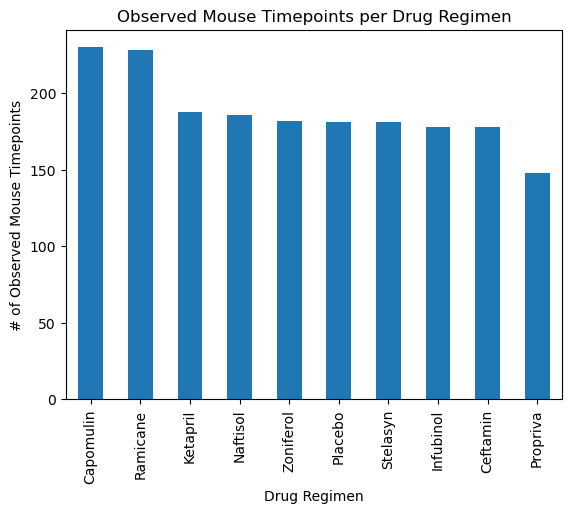

In [12]:
mice_count_pandasplot = mice_count.plot(kind="bar", title="Observed Mouse Timepoints per Drug Regimen", legend=False)
mice_count_pandasplot.set_ylabel("# of Observed Mouse Timepoints")
plt.show()

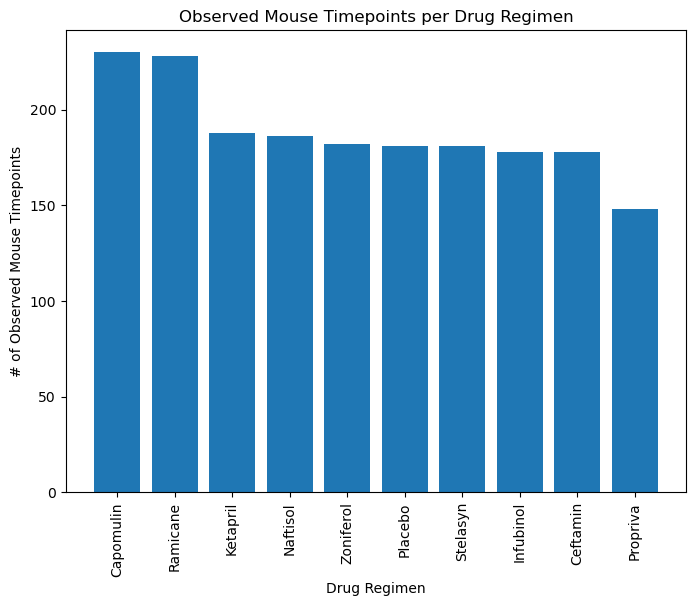

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,6))
plt.bar(mice_count.index, mice_count.values)
plt.title("Observed Mouse Timepoints per Drug Regimen")
plt.xlabel('Drug Regimen')
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show()

In [14]:
unique_mice_gender = combined_clean.drop_duplicates(subset='Mouse ID')[['Mouse ID', 'Sex']]

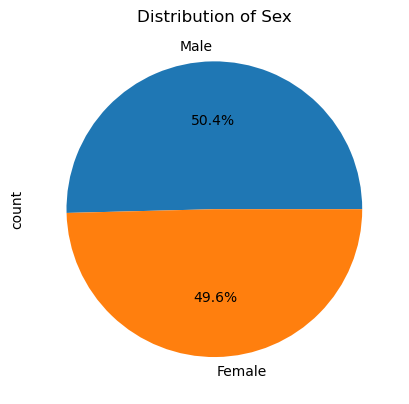

In [15]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=360)
plt.ylabel('count')
plt.title('Distribution of Sex', loc='center', pad=-20, rotation=360, fontsize=12)
plt.show()

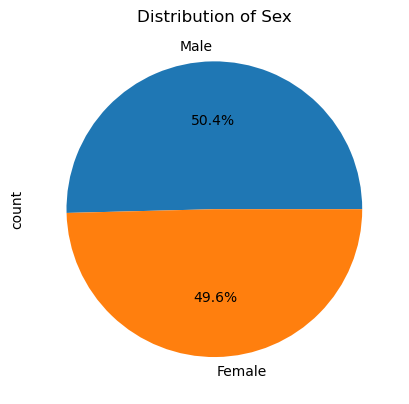

In [16]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts_pylot = unique_mice_gender['Sex'].value_counts()

# Make the pie chart
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=360)
plt.ylabel('count')
plt.title('Distribution of Sex', loc='center', pad=-20, rotation=360, fontsize=12)
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_ids = combined_clean["Mouse ID"].unique()
max_times = []

for mouse in mouse_ids:
    max_timepoint = combined_clean.loc[combined_clean["Mouse ID"] == mouse, "Timepoint"].max()
    max_tumor_volume = combined_clean.loc[(combined_clean["Mouse ID"] == mouse) & (combined_clean["Timepoint"] == max_timepoint), "Tumor Volume (mm3)"].values[0]
    drug_regimen = combined_clean.loc[(combined_clean["Mouse ID"] == mouse) & (combined_clean["Timepoint"] == max_timepoint), "Drug Regimen"].values[0]
    max_times.append({"Mouse ID": mouse, "Timepoint": max_timepoint, "Final Tumor Vol": max_tumor_volume, "Drug Regimen": drug_regimen})

max_times_df = pd.DataFrame(max_times)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_times_merged = pd.merge(combined_clean, max_times_df, on=["Mouse ID", "Timepoint"], how="inner")

max_times_merged["Tumor Volume (mm3)"] = max_times_merged["Final Tumor Vol"]

#Organizing columns

max_times_merged.drop("Final Tumor Vol", axis=1, inplace=True)

max_times_merged.rename(columns={"Tumor Volume (mm3)": "Final Tumor Vol"}, inplace=True)

max_times_merged.drop("Drug Regimen_y", axis=1, inplace=True)

max_times_merged.rename(columns={"Drug Regimen_x": "Drug Regimen"}, inplace=True)

max_times_merged

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Vol,Metastatic Sites
0,9,k403,Ramicane,Male,21,16,45,22.050126,1
1,19,s185,Capomulin,Female,3,17,45,23.343598,1
2,29,x401,Capomulin,Female,16,15,45,28.484033,0
3,39,m601,Capomulin,Male,22,17,45,28.430964,1
4,49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...
243,1859,z314,Stelasyn,Female,21,28,5,45.934712,0
244,1862,z435,Propriva,Female,12,26,10,48.710661,0
245,1872,z581,Infubinol,Female,24,25,45,62.754451,3
246,1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in regimens:
    max_drug = max_times_merged.loc[max_times_merged["Drug Regimen"]==drug,:]
    quartiles = max_drug["Final Tumor Vol"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # add subset
    final_tumor_vol.append(max_drug["Final Tumor Vol"])

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    print(f"The lower quartile of Final Tumor Vol for {drug} is: {lowerq}")
    print(f"The upper quartile of Final Tumor Vol for {drug} is: {upperq}")
    print(f"The interquartile range of Final Tumor Vol for {drug} is: {iqr}")
    print(f"The median of Final Tumor Vol for {drug} is: {quartiles[0.5]}")
    
    outlier_vol = max_drug.loc[(max_drug['Final Tumor Vol'] < lower_bound) | (max_drug['Final Tumor Vol'] > upper_bound)]
    
    if len(outlier_vol) == 0:
        print(f"\n{drug} has no potential outliers\n")
        print("-------------------------------------")
    else:
        print(f"{drug}'s potential outliers:")
        print(outlier_vol.to_string(index=False))
        print("-------------------------------------")

The lower quartile of Final Tumor Vol for Capomulin is: 32.37735684
The upper quartile of Final Tumor Vol for Capomulin is: 40.1592203
The interquartile range of Final Tumor Vol for Capomulin is: 7.781863460000004
The median of Final Tumor Vol for Capomulin is: 38.1251644

Capomulin has no potential outliers

-------------------------------------
The lower quartile of Final Tumor Vol for Ramicane is: 31.56046955
The upper quartile of Final Tumor Vol for Ramicane is: 40.65900627
The interquartile range of Final Tumor Vol for Ramicane is: 9.098536719999998
The median of Final Tumor Vol for Ramicane is: 36.56165229

Ramicane has no potential outliers

-------------------------------------
The lower quartile of Final Tumor Vol for Infubinol is: 54.04860769
The upper quartile of Final Tumor Vol for Infubinol is: 65.52574285
The interquartile range of Final Tumor Vol for Infubinol is: 11.477135160000003
The median of Final Tumor Vol for Infubinol is: 60.16518046
Infubinol's potential outlier

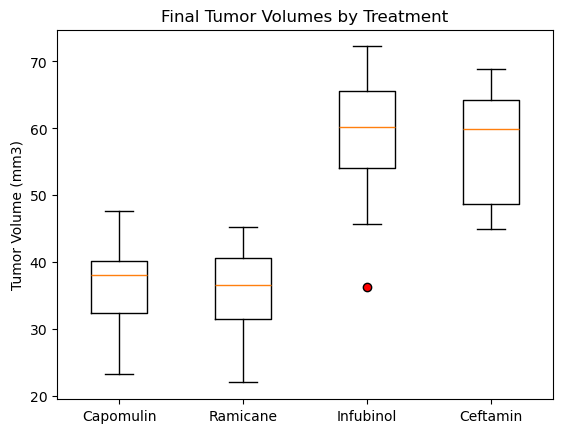

In [19]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.boxplot(final_tumor_vol, flierprops=dict(markerfacecolor='red'))

ax.set_title('Final Tumor Volumes by Treatment')
ax.set_ylabel('Tumor Volume (mm3)')

# Set the tick locations and labels on the x-axis
ax.set_xticks(range(1, len(regimens) + 1))
ax.set_xticklabels(regimens)

plt.show()

## Line and Scatter Plots

In [20]:
Capomulin = combined_clean.loc[combined_clean["Drug Regimen"] == "Capomulin",:]

Text(0, 0.5, 'Tumor Volume (mm3)')

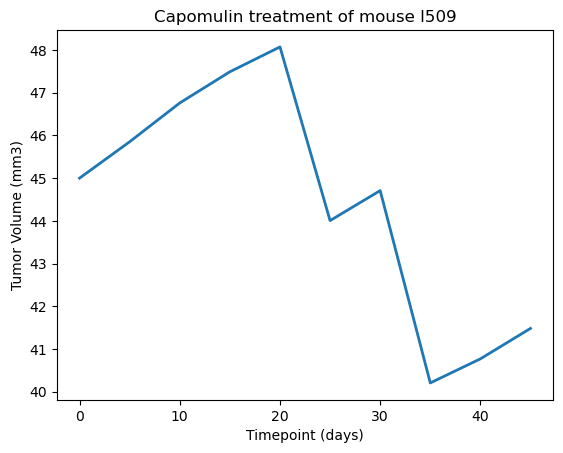

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
progression_line = Capomulin.loc[Capomulin["Mouse ID"] == "l509",:]
x_axis = progression_line["Timepoint"]
y_axis = progression_line["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatment of mouse l509')
plt.plot(x_axis, y_axis, linewidth=2, markersize=15)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

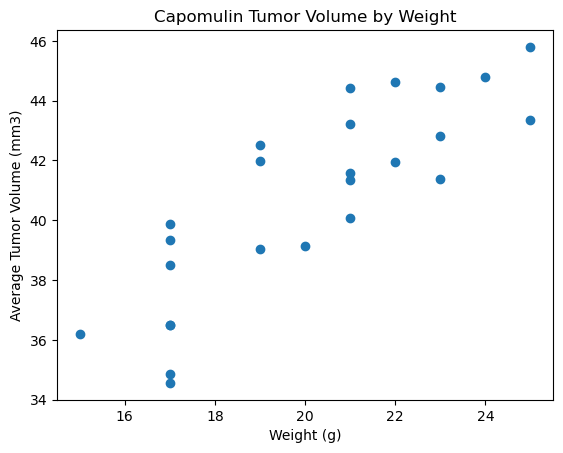

In [22]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
vol_by_weight = combined_clean.loc[combined_clean["Drug Regimen"]=="Capomulin",:].groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()
plt.scatter(vol_by_weight["Weight (g)"],vol_by_weight["Tumor Volume (mm3)"])
plt.title("Capomulin Tumor Volume by Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and a linear regression model

#Correlation Coefficient:
correlation = st.pearsonr(vol_by_weight['Weight (g)'],vol_by_weight['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

#Linear Regression:
from scipy.stats import linregress
(slope, intercept,rvalue, pvalue, stderr)= linregress(vol_by_weight["Weight (g)"],vol_by_weight["Tumor Volume (mm3)"])
regress_values=vol_by_weight["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

The correlation between mouse weight and the average tumor volume is 0.84


The r-squared is: 0.709


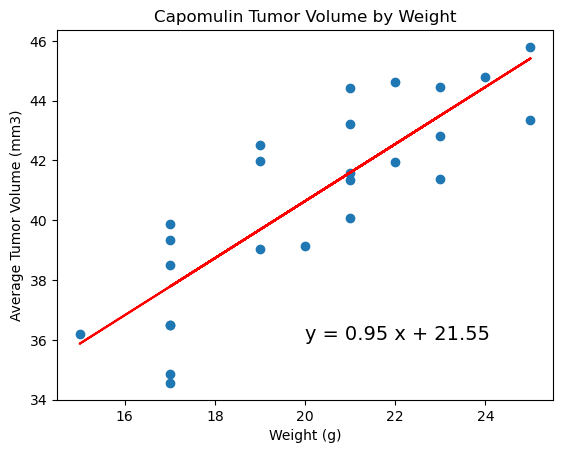

In [24]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
marker_size=15
plt.scatter(vol_by_weight["Weight (g)"],vol_by_weight["Tumor Volume (mm3)"])
plt.plot(vol_by_weight["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin Tumor Volume by Weight")
print(f"The r-squared is: {round(rvalue**2,3)}")
plt.show()